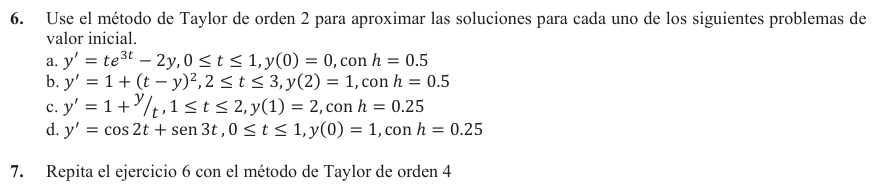

In [1]:
import numpy as np
import pandas as pd

# Método de Taylor de orden 4
def taylor_orden_4(f, f1, f2, f3, t0, y0, h, t_end):
    t_values = [t0]
    y_values = [y0]
    t, y = t0, y0
    steps = int((t_end - t0) / h)
    
    for _ in range(steps):
        f_val  = f(t, y)
        f1_val = f1(t, y)
        f2_val = f2(t, y)
        f3_val = f3(t, y)
        
        y = y + h * f_val + (h**2 / 2) * f1_val + (h**3 / 6) * f2_val + (h**4 / 24) * f3_val
        t += h
        t_values.append(t)
        y_values.append(y)
        
    return pd.DataFrame({"t": t_values, "y_aprox": y_values})

# ========== a. y' = t*e^(3t) - 2y ==========

f_a  = lambda t, y: t*np.exp(3*t) - 2*y
f1_a = lambda t, y: (1 + 3*t)*np.exp(3*t) - 2*f_a(t, y)
f2_a = lambda t, y: 6*np.exp(3*t) + 9*(1 + 3*t)*np.exp(3*t) - 2*f1_a(t, y)
f3_a = lambda t, y: (27*(1 + 3*t) + 54)*np.exp(3*t) - 2*f2_a(t, y)

df_a = taylor_orden_4(f_a, f1_a, f2_a, f3_a, t0=0, y0=0, h=0.5, t_end=1)

# ========== b. y' = 1 + (t - y)^2 ==========

f_b  = lambda t, y: 1 + (t - y)**2
f1_b = lambda t, y: 2*(t - y)*(1 - f_b(t, y))
f2_b = lambda t, y: 2*(1 - f_b(t, y))**2 - 2*(t - y)*f1_b(t, y)
f3_b = lambda t, y: (-4*(1 - f_b(t, y))*f1_b(t, y) - 2*f1_b(t, y)*(1 - f_b(t, y)) + 2*(t - y)*f2_b(t, y))

df_b = taylor_orden_4(f_b, f1_b, f2_b, f3_b, t0=2, y0=1, h=0.5, t_end=3)

# ========== c. y' = 1 + y/t ==========

f_c  = lambda t, y: 1 + y / t
f1_c = lambda t, y: -y / t**2 + (1 / t) * f_c(t, y)
f2_c = lambda t, y: (2 * y) / t**3 - 2 * f_c(t, y) / t**2 + (1 / t) * f1_c(t, y)
f3_c = lambda t, y: (-6 * y) / t**4 + 6 * f_c(t, y) / t**3 - 3 * f1_c(t, y) / t**2 + (1 / t) * f2_c(t, y)

df_c = taylor_orden_4(f_c, f1_c, f2_c, f3_c, t0=1, y0=2, h=0.25, t_end=2)

# ========== d. y' = cos(2t) + sin(3t) ==========

f_d  = lambda t, y: np.cos(2*t) + np.sin(3*t)
f1_d = lambda t, y: -2*np.sin(2*t) + 3*np.cos(3*t)
f2_d = lambda t, y: -4*np.cos(2*t) - 9*np.sin(3*t)
f3_d = lambda t, y: 8*np.sin(2*t) - 27*np.cos(3*t)

df_d = taylor_orden_4(f_d, f1_d, f2_d, f3_d, t0=0, y0=1, h=0.25, t_end=1)

# ========== Resultados ==========

print("\nResultados - Método de Taylor de orden 4:")
for letra, df in zip("abcd", [df_a, df_b, df_c, df_d]):
    print(f"\nInciso {letra}:\n{df}")



Resultados - Método de Taylor de orden 4:

Inciso a:
     t   y_aprox
0  0.0  0.000000
1  0.5  0.539062
2  1.0  5.366595

Inciso b:
     t   y_aprox
0  2.0  1.000000
1  2.5  1.875000
2  3.0  2.528351

Inciso c:
      t   y_aprox
0  1.00  2.000000
1  1.25  2.778971
2  1.50  3.608266
3  1.75  4.479416
4  2.00  5.386400

Inciso d:
      t   y_aprox
0  0.00  1.000000
1  0.25  1.328939
2  0.50  1.729667
3  0.75  2.039934
4  1.00  2.115988
